In [1]:
import pandas as pd

wine = pd.read_csv("https://bit.ly/wine-date")
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [2]:
# class 0 이면 레드와인 , 1 이면 화이트 와인

# 문제집 정답지 나누기
# 문제 데이터
data = wine[['alcohol','sugar','pH']].to_numpy()
data

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [3]:
# 정답지
target = wine['class'].to_numpy()
target

array([0., 0., 0., ..., 1., 1., 1.])

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data,target,test_size=0.2) # 기본값 75 훈련 25 시험데이터 -> 80훈련데이터 20시험데이터


In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_input,train_target)

lr.score(test_input,test_target)

0.7738461538461539

In [7]:
# 77.3% 정확도
lr.coef_ # 요인이 3개라서 3개

array([[ 0.4330465 ,  0.35206022, -4.23539225]])

In [8]:
lr.intercept_

array([8.97815267])

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(train_input,train_target)

dt.score(test_input,test_target)

0.8615384615384616

In [10]:
# 결정 트리 사용후 86% 으로 오름

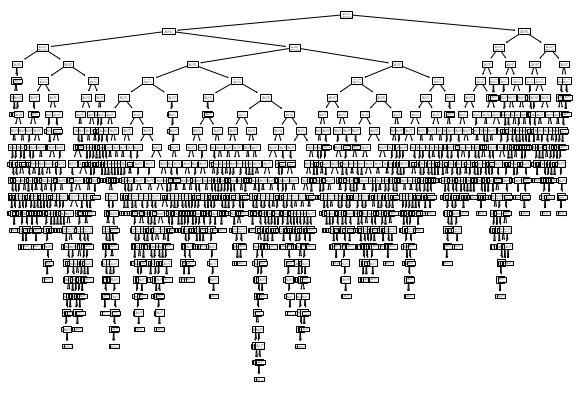

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show() # 결정트리가 화이트 레드 와인 구분을 위해 스무고개한 장면

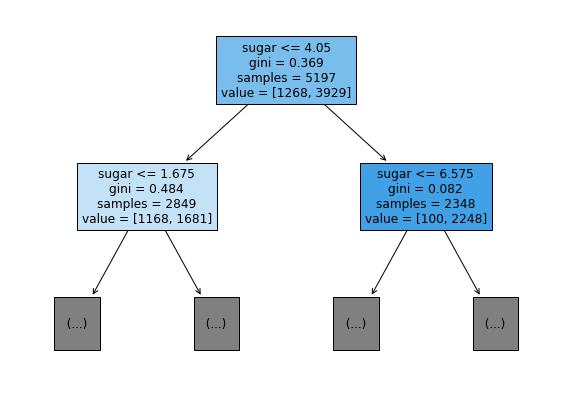

In [14]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alchol','sugar','pH'])
plt.show()

In [15]:
# 4.05 이하면 왼쪽 초과면 오른쪽
# 불순도 0일수록 확실
# 0 레드와인 1 화이트 와인

In [17]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(train_input,train_target)

DecisionTreeClassifier(max_depth=3)

In [18]:
dt.score(test_input,test_target)

0.8415384615384616

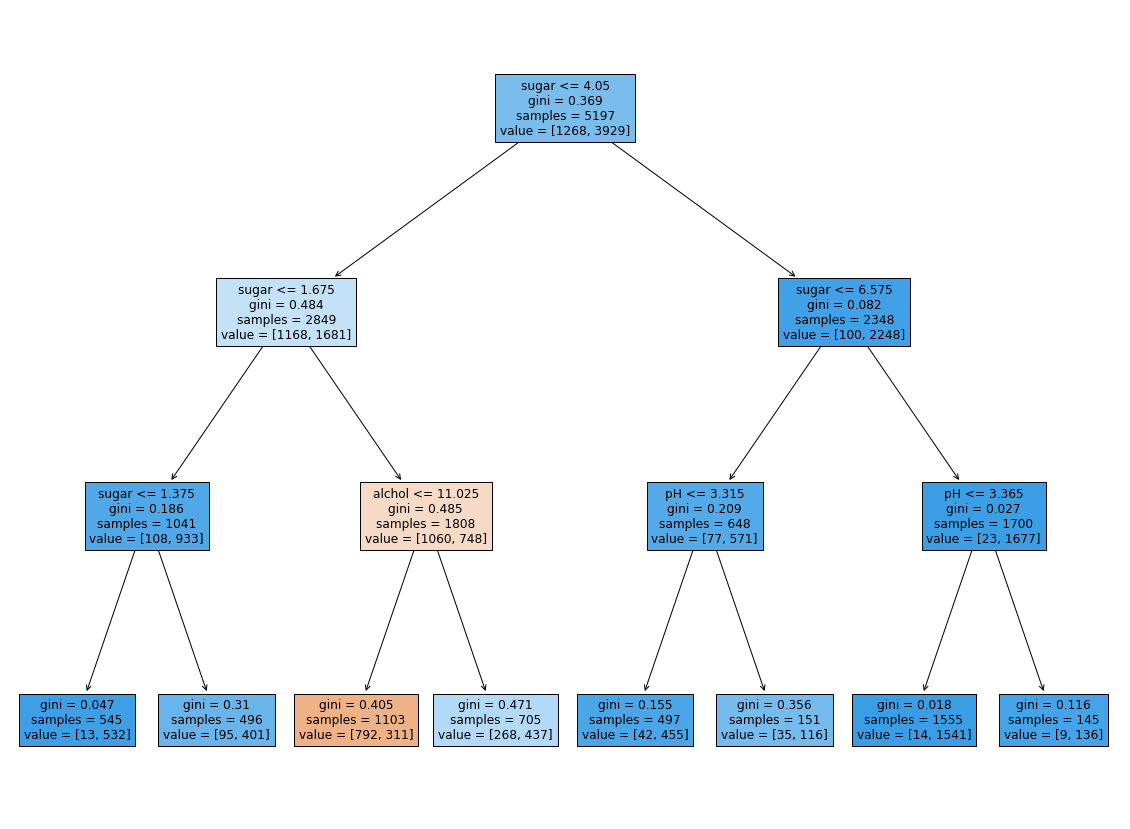

In [20]:
#84% 정확도

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alchol','sugar','pH'])
plt.show()